# Problem statement-1

Forecast The Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


In [114]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [116]:
# Reading the dataset
air = pd.read_excel("Airlines+Data.xlsx",sheet_name='Sheet1')

air= air.set_index('Month')
air.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


# EDA


In [117]:
air.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [118]:
## assigning frequency to datetimeindex

air.index.freq = 'MS' 

In [119]:
air.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01', '1995-11-01', '1995-12-01',
               '1996-01-01', '1996-02-01', '1996-03-01', '1996-04-01',
               '1996-05-01', '1996-06-01', '1996-07-01', '1996-08-01',
               '1996-09-01', '1996-10-01', '1996-11-01', '1996-12-01',
               '1997-01-01', '1997-02-01', '1997-03-01', '1997-04-01',
               '1997-05-01', '1997-06-01', '1997-07-01', '1997-08-01',
               '1997-09-01', '1997-10-01', '1997-11-01', '1997-12-01',
               '1998-01-01', '1998-02-01', '1998-03-01', '1998-04-01',
               '1998-05-01', '1998-06-01', '1998-07-01', '1998-08-01',
               '1998-09-01', '1998-10-01', '1998-11-01', '1998-12-01',
               '1999-01-01', '1999-02-01', '1999-03-01', '1999-04-01',
               '1999-05-01', '1999-06-01', '1999-07-01', '1999-08-01',
      

In [120]:
air.shape

(96, 1)

In [121]:
air.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [122]:
air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [123]:
air.value_counts()

Passengers
229           3
237           2
172           2
178           2
180           2
             ..
181           1
171           1
166           1
163           1
413           1
Length: 80, dtype: int64

In [124]:
air.duplicated().sum()

16

# Visualization Analysis:-

In [ ]:
# Time Series Analysis

<AxesSubplot:xlabel='Month'>

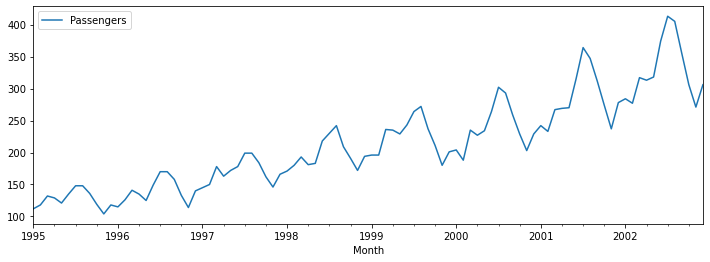

In [125]:
# Line plot

air.plot(figsize=(12,4))

<AxesSubplot:>

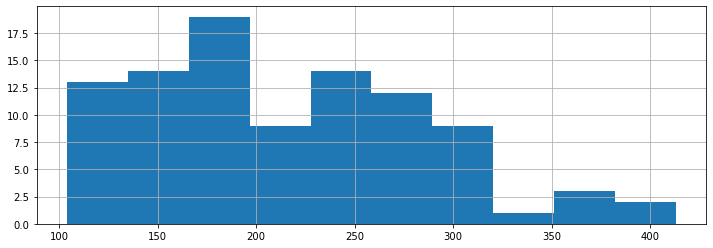

In [126]:
# Histogram

air['Passengers'].hist(figsize=(12,4))

<AxesSubplot:ylabel='Density'>

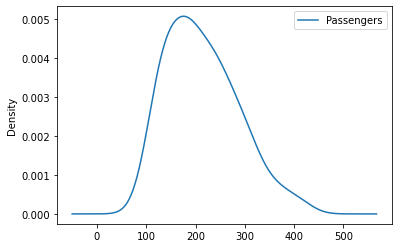

In [127]:
# Density Plot

air.plot(kind='kde')

In [128]:
air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


## Time Series Decomposition

In [129]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Additive Seasonal decompose

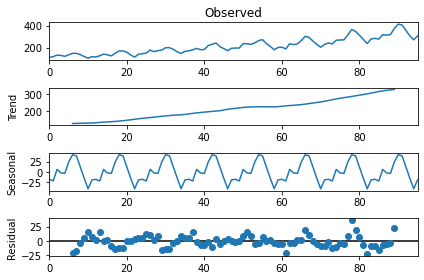

In [130]:
# frequency=12 for monthly data

ts_decomp= seasonal_decompose((air.values),model='additive',period = 12)

ts_plot = ts_decomp.plot()

### Multiplicative Seasonal Decompose

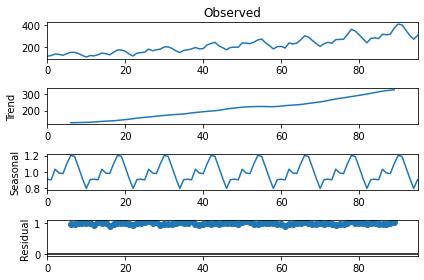

In [131]:
# frequency=12 for monthly data

ts_decomp_mul= seasonal_decompose((air.values),model='multiplicative',period = 12)

ts_plot_mul = ts_decomp_mul.plot()

In [1]:
# Forecasting models building
# We will forecast last two years 2001 and 2002 so the last 24 records will be test data. And first 72 records will be training data.

# Training -Testing Data

In [132]:
air_train=air[0:72]
air_test=air[72:]

In [133]:
print("Length of train data is:",len(air_train))
print("Length of test data is:",len(air_test))


Length of train data is: 72
Length of test data is: 24


In [134]:
air_train.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [135]:
air_test.head()

,Passengers
Month,
2001-01-01,242
2001-02-01,233
2001-03-01,267
2001-04-01,269
2001-05-01,270


## Methods for Forecasting

## 1.  Simple Moving Average 

In [136]:
air_ma=air.copy()

In [137]:
train_len=72

In [138]:
air_ma['ma_forecast'] = air_ma['Passengers'].rolling(12).mean()

In [139]:
air_ma['ma_forecast'][train_len:] = air_ma['ma_forecast'][train_len-1]

# Calculating MSE

In [140]:
from sklearn.metrics import mean_squared_error

In [141]:
## Calculating RMSE and MAPE
rmse_ma = mean_squared_error(air_test['Passengers'],air_ma['ma_forecast'][train_len:],squared=False).round(2)
rmse_ma

82.89

## 2.  Simple Exponential Smoothing

In [142]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [143]:
ses_model = SimpleExpSmoothing(air_train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = air_test.index[0],end = air_test.index[-1])

In [144]:
rmse_ses = mean_squared_error(air_test['Passengers'],pred_ses,squared=False).round(2)
rmse_ses

83.65

## 3. Holt's Method

In [145]:
from statsmodels.tsa.holtwinters import Holt

In [146]:
holt_model = Holt(air_train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_holt = holt_model.predict(start = air_test.index[0],end = air_test.index[-1])

In [147]:
rmse_holt = mean_squared_error(air_test['Passengers'],pred_holt,squared=False).round(2)
rmse_holt

148.19

## 4. Holt's Exponential Smoothing

### a. Additive method

In [148]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [149]:
hes_add_add = ExponentialSmoothing(air_train['Passengers'],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hes_add_add = hes_add_add.predict(start = air_test.index[0],end = air_test.index[-1])

In [150]:
rmse_hes_add_add = mean_squared_error(air_test['Passengers'],pred_hes_add_add,squared=False).round(2)
rmse_hes_add_add

47.57

### b. Multiplicative method

In [151]:
hes_mul_add = ExponentialSmoothing(air_train['Passengers'],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hes_mul_add = hes_mul_add.predict(start = air_test.index[0],end = air_test.index[-1])

In [152]:
rmse_hes_mul_add = mean_squared_error(air_test['Passengers'],pred_hes_mul_add,squared=False).round(2)
rmse_hes_mul_add

34.99

In [ ]:
# Auto Regressive (AR)
# For this model, non stationary time series needs to be converted to stationary time series. ARIMA model automatically perfrorms differencing to convert non-stationary series to stationary series.

## 5. ARIMA Model:-

### ACF plot

In [153]:
from statsmodels.graphics.tsaplots import plot_acf

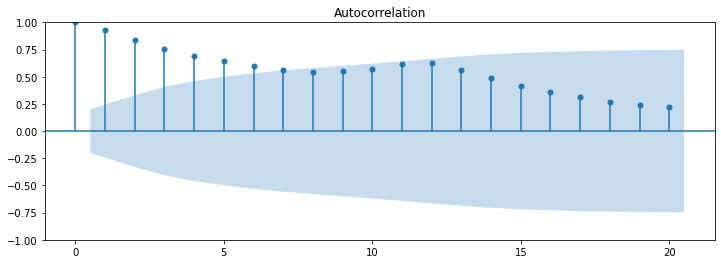

In [154]:
# Show autocorrelation upto lag 20
plt.figure(figsize=(12,4))
acf_plot = plot_acf( air['Passengers'],ax=plt.gca(),lags=20)
plt.show()

The above plot shows that auto correlation is significant for lag=1

### PCF plot

In [155]:
from statsmodels.graphics.tsaplots import plot_pacf

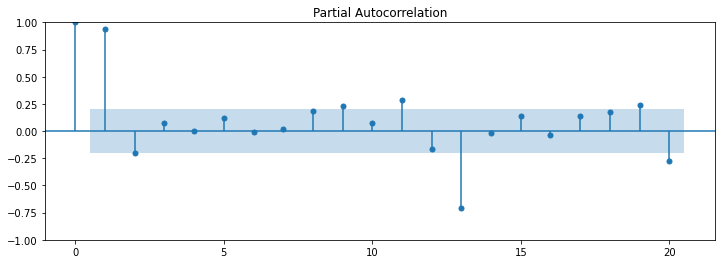

In [156]:
plt.figure(figsize=(12,4))
pacf_plot = plot_pacf( air['Passengers'],ax=plt.gca(),lags=20)
plt.show()

In [174]:
from statsmodels.tsa.arima_model import ARIMA

In [175]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [176]:
arima = ARIMA(air_train['Passengers'], order=(1,1,1)).fit()
pred_arima= arima.predict(start = air_test.index[0],end = air_test.index[-1])

In [177]:
rmse_arima = mean_squared_error(air_test['Passengers'],pred_arima,squared=False).round(2)
rmse_arima

88.96

## Choosing the best model

In [178]:
models=['simple_moving_average','simple_expo_smoothing','Holt','Holt_additive','Holt_multiplicative','ARIMA']
rmse=[rmse_ma,rmse_ses,rmse_holt,rmse_hes_add_add,rmse_hes_mul_add,rmse_arima]
d={'Models':models,'Rmse':rmse}
df_model=pd.DataFrame(d)
df_model

,Models,Rmse
0,simple_moving_average,82.89
1,simple_expo_smoothing,83.65
2,Holt,148.19
3,Holt_additive,47.57
4,Holt_multiplicative,34.99
5,ARIMA,88.96


In [179]:
df_model.sort_values(by='Rmse')

,Models,Rmse
4,Holt_multiplicative,34.99
3,Holt_additive,47.57
0,simple_moving_average,82.89
1,simple_expo_smoothing,83.65
5,ARIMA,88.96
2,Holt,148.19


So Holt_multiplicative smoothing with multiplicative seasonality and additive trend is the best model as it has the lowest rmse.